# Image Compression with the Singular Value Decomposition (SVD) Implementation

#### In this Jupyter notebook, I implement image compression using the Singular Value Decomposition (SVD). This technique factorizes an image into three components. The image is represented as a matrix with entries for pixels; the number in each entry corresponds to the brightness or color of the pixel. Similarly, the three components the image is broken down into are also matrices, U, Sigma, and V transpose.

#### We first find the principle components of the image (matrix A), from which it follows one can also construct the three aforementioned matrices. By adjusting how many principle components we use (denoted by k) in constructing the U, Sigma, and V transpose matrices, we try to balance compression and image quality. A lower k leads to higher compression but more detail loss, while a higher k better preserves the original image. This notebook demonstrates how the image gradually regains clarity as more singular values are retained, and plots information loss to attempt to determine the best k for reaching a balance.

#### The image used here is a grayscale version of `whale_handshake.jpg`, which I compress and display at different levels.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread

## Import & Filter the Data

In [2]:
# Load and convert image to grayscale
image = imread("whale_handshake.jpg")
gray_image = rgb2gray(image)

## SVD Algorithm

In [3]:
# Perform SVD
U, S, VT = np.linalg.svd(gray_image, full_matrices=False)

# Function to reconstruct image using top k singular values
def compress_image(U, S, VT, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    return np.dot(U_k, np.dot(S_k, VT_k))

## Result

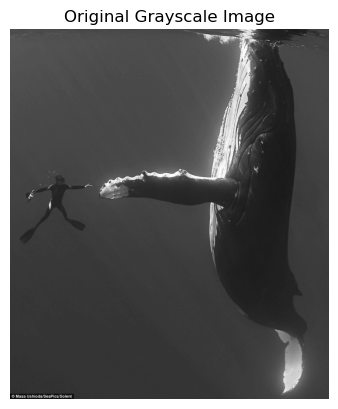

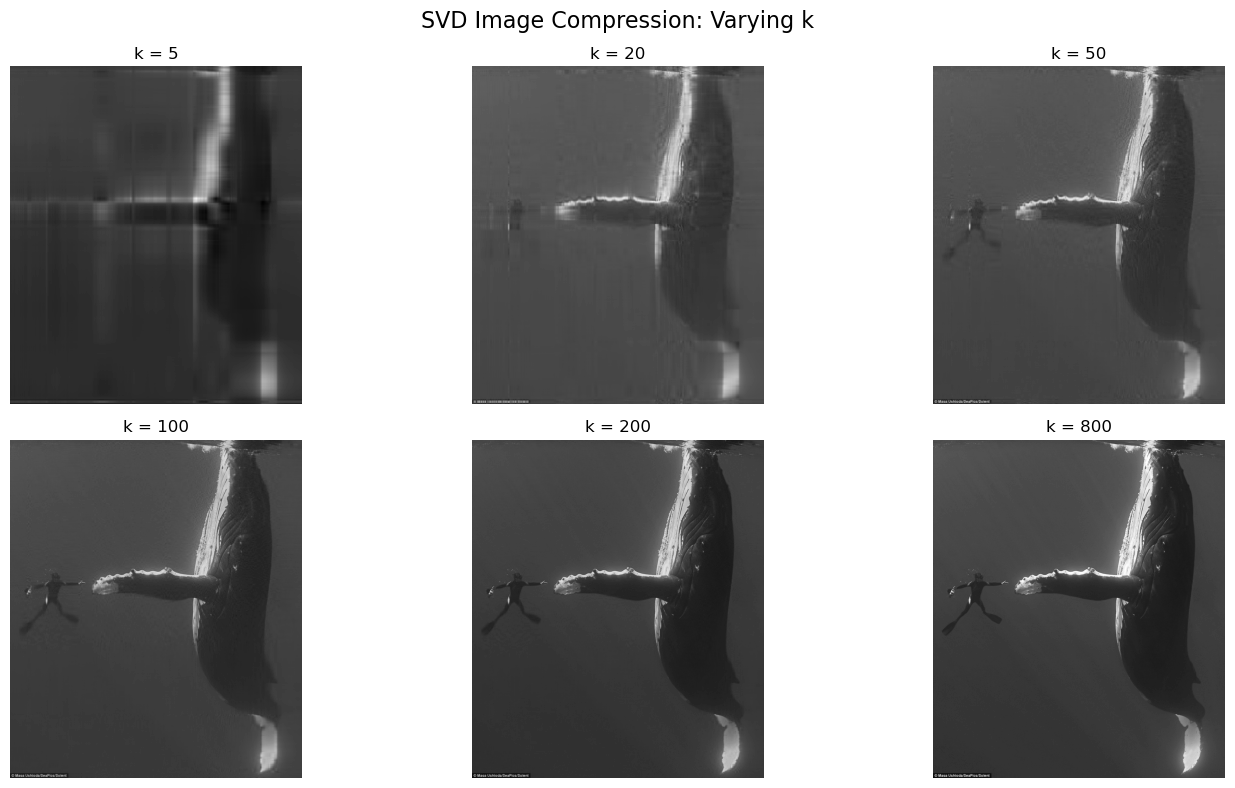

In [6]:
# Display the original grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

# Try different k values
ks = [5, 20, 50, 100, 200, 800]

plt.figure(figsize=(15, 8))
for i, k in enumerate(ks):
    compressed = compress_image(U, S, VT, k)
    plt.subplot(2, 3, i+1)
    plt.imshow(compressed, cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.suptitle("SVD Image Compression: Varying k", fontsize=16)
plt.tight_layout()
plt.show()

## Analysis & Discussion
Visually, we can see that the image is recognizable with very small, and is already good enough at k=50, with it beginning to get hard to distinguish at a glance from the original image at k=100. To better (i.e., quantitatively) understand how much information is lost as we decrease k, I plot the **cumulative explained variance**. That is, the proportion of the image’s total "energy" (as measured by the singular values) retained when using the top k components.

This helps us identify a good trade-off point: the smallest k for which we retain most of the image's structure and details, while keeping the file size small. A common goal is to find the smallest k such that **at least 90–95% of the variance is retained**. In that vein, the desired k is somewhere between 250 and 300.

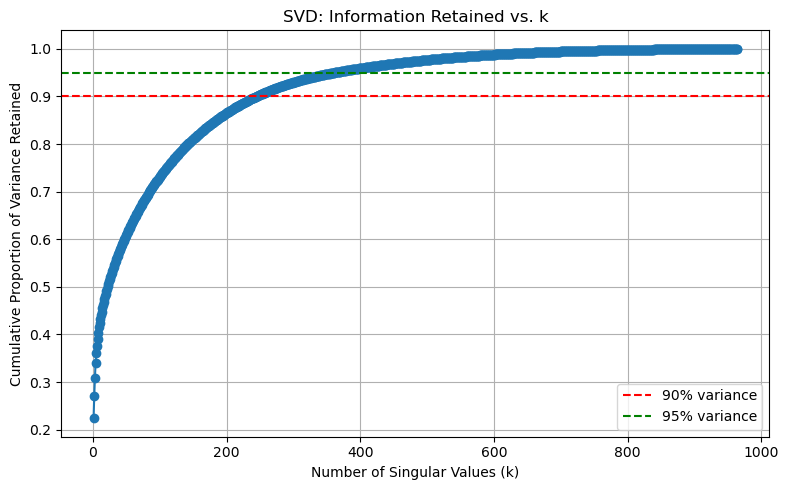

In [7]:
# Total sum of all singular values (image energy)
total_energy = np.sum(S)

# Formula for cumulative energy (explained variance) for increasing k
cumulative_energy = np.cumsum(S) / total_energy

# Plot it
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(S)+1), cumulative_energy, marker='o')
plt.axhline(0.90, color='red', linestyle='--', label='90% variance')
plt.axhline(0.95, color='green', linestyle='--', label='95% variance')
plt.xlabel("Number of Singular Values (k)")
plt.ylabel("Cumulative Proportion of Variance Retained")
plt.title("SVD: Information Retained vs. k")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

We observe a familiar "elbow curve," since early singular values contribute the most information (or energy), while the curve starts to flatten as k increases.

The red dashed line marks **90% of the total variance**, while the green dashed line marks **95%**.

From this plot, we can see that:
- Using just the top **200–300 singular values** (out of almost 1000!) already captures over **90% of the image’s structure**, resulting in a strong balance between compression and quality.
- Beyond the 200-300 most important singular values, adding more components does not increase the variance retained in the picture much, but it of course continues to increase computational cost and image size.